In [1]:
from collections import defaultdict

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

In [2]:
env = gym.make('CliffWalking-v0', render_mode='rgb_array')

env.reset()

(36, {'prob': 1})

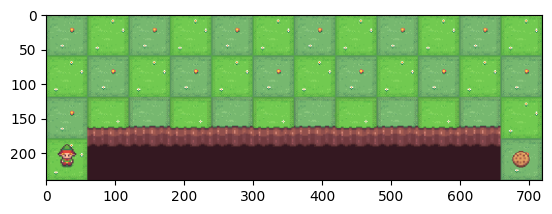

In [3]:

for _ in range(40):
    env.step(env.action_space.sample())
    plt.imshow(env.render())
    
    display.display(plt.gcf())

    display.clear_output(wait=True)

    

In [4]:
def generate_episode(env, policy, max_iter = 250, render = False):
    obs, _ = env.reset()
    actions = []
    observations = []
    rewards = []    
    for _ in range(max_iter):
        action = policy(obs)
        observations.append(obs)
        actions.append(action)

        obs, reward, done, trunc, _ = env.step(action)

        if render:
            plt.imshow(env.render())
            display.display(plt.gcf())
            display.clear_output(wait=True)

        rewards.append(reward)

        if done or trunc: 
            break

    return observations, actions, rewards

In [19]:
def first_visit_mc_control(env, epsilon=0.0, gamma=1.0, n_episode=5000):
    q_table = defaultdict(float)
    N = defaultdict(int)

    def policy(obs):
        # get best from q_table
        action_values = [q_table[obs, a] for a in range(4)]
        return np.argmax(action_values) if epsilon <= np.random.random() else np.random.choice(4) 

    for _ in range(n_episode):
        observations, actions, rewards = generate_episode(env, policy)
        returns = 0
        # Calculate the return
        for t in reversed(range(len(observations))):
            S = observations[t]
            A = actions[t]
            R = rewards[t]

            returns = R + gamma * returns

            if (S, A) not in zip(observations[:t], actions[:t]):
                N[S, A] += 1
                q_table[S, A] += (returns - q_table[S, A]) / N[S, A]

    return q_table

In [32]:
q_table = first_visit_mc_control(env, epsilon=0.4, gamma=0.95)

In [33]:
def policy(obs):
    return np.argmax([q_table[obs, a] for a in range(4)])

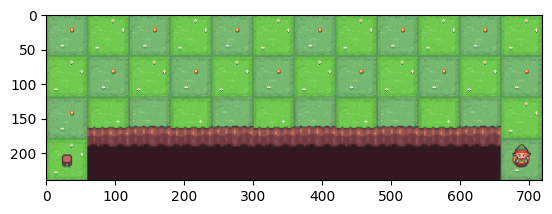

In [34]:
_ = generate_episode(env, policy, render=True)